In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




## Table of contents

### **1. Data checking, preprocessing**

### **2. Data visualization**

### **3. Model training**

### **4. Predicting test dataset**

### 1. bike sharing data pre-processing

In [10]:
#importing the train data for data wrangling

train = pd.read_csv("train.csv")

#checking for data types
print(train.dtypes)


datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [11]:
#creating three different datetime columns - one with date, another with hours, and third one with month

train["datetime"] = train["datetime"].astype('datetime64[ns]')
train["month"] = train["datetime"].dt.month
train["year"] = train["datetime"].dt.year
train["hour"] = train["datetime"].dt.hour



In [12]:
#Description of all of the columns
print(train.describe(include = "all").T)

              count unique        top freq      first                last  \
datetime      10886  10886 2011-01-01    1 2011-01-01 2012-12-19 23:00:00   
season      10886.0    NaN        NaT  NaN        NaT                 NaT   
holiday     10886.0    NaN        NaT  NaN        NaT                 NaT   
workingday  10886.0    NaN        NaT  NaN        NaT                 NaT   
weather     10886.0    NaN        NaT  NaN        NaT                 NaT   
temp        10886.0    NaN        NaT  NaN        NaT                 NaT   
atemp       10886.0    NaN        NaT  NaN        NaT                 NaT   
humidity    10886.0    NaN        NaT  NaN        NaT                 NaT   
windspeed   10886.0    NaN        NaT  NaN        NaT                 NaT   
casual      10886.0    NaN        NaT  NaN        NaT                 NaT   
registered  10886.0    NaN        NaT  NaN        NaT                 NaT   
count       10886.0    NaN        NaT  NaN        NaT                 NaT   

C:\Users\gaming\AppData\Local\Temp\ipykernel_27464\1679879336.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(train.describe(include = "all").T)


In [13]:
#checking for null-values

train.isnull().sum()
train[train==0].count()


datetime          0
season            0
holiday       10575
workingday     3474
weather           0
temp              0
atemp             0
humidity         22
windspeed      1313
casual          986
registered       15
count             0
month             0
year              0
hour            455
dtype: int64

float numbers do not have missing values. for categorical values such as holiday (1,0), workingdays (1,0) or the floating variables were 0 is providing information (e.g. windspeed, humidity) this does not apply. 

In [14]:
#A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. 
#A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. 
#A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

train.skew()

C:\Users\gaming\AppData\Local\Temp\ipykernel_27464\1510475157.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


season       -0.007076
holiday       5.660517
workingday   -0.776163
weather       1.243484
temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
month        -0.005237
year         -0.007717
hour         -0.009125
dtype: float64

In [15]:
# check for duplicates
len(train[train.duplicated()])

0

no duplicated data present.
overall it can be said that the data is sufficiently cleaned to do the data visualization.

### 2. visualization of data

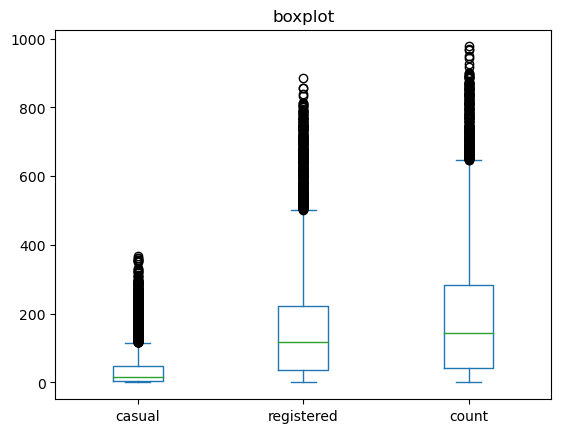

In [16]:
#Visualizing the target distribution

ax = train[['casual', 'registered', "count"]].plot(kind='box', title='boxplot')
plt.show()

"count" is the total sum of "casual" and "registered". most of the users are "registered" ones. many outliers can be noticed as well.

<AxesSubplot:ylabel='Frequency'>

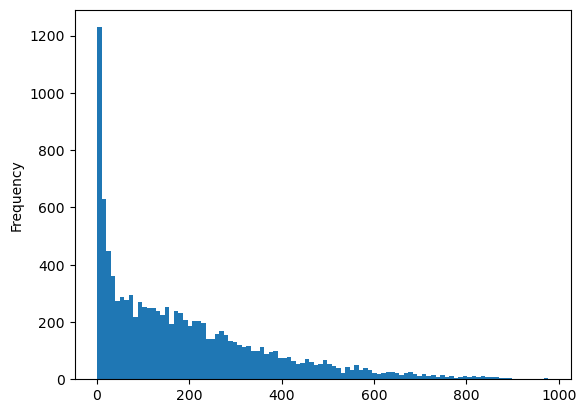

In [31]:
#checking the distribution of count column
train["count"].plot.hist(bins = 100)

it is positively skewed. high presence of low value counts (close to 0).

In [17]:
train.groupby("season")["count"].count()

season
1    2686
2    2733
3    2733
4    2734
Name: count, dtype: int64

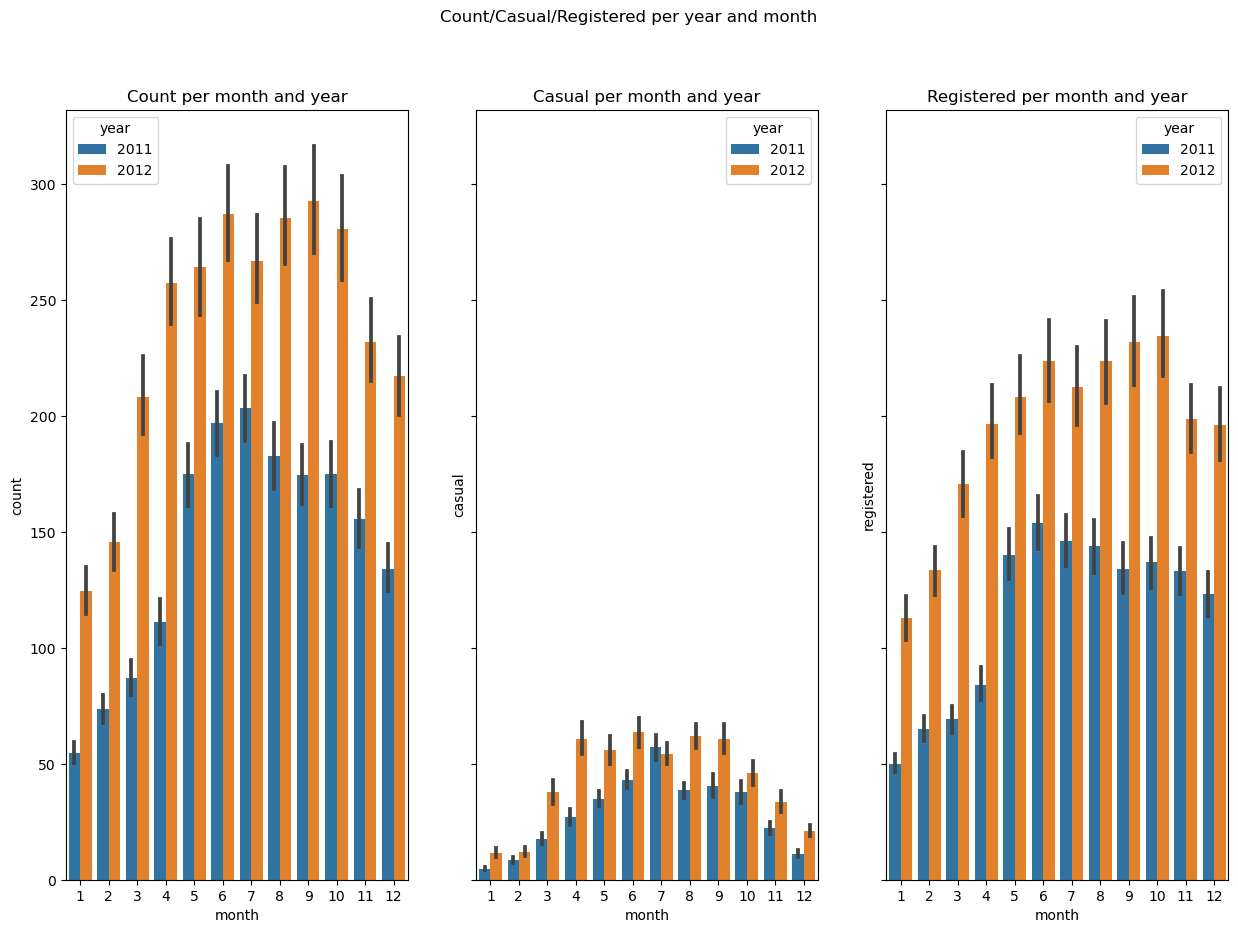

In [18]:
# Count per month and year
fig, ax = plt.subplots(1,3, figsize = [15,10], sharey = True)
fig.suptitle('Count/Casual/Registered per year and month')
sns.barplot(ax = ax[0], data = train, x = "month", y = "count", hue = "year")
ax[0].set_title("Count per month and year")
sns.barplot(ax =ax[1], data = train, x = "month", y = "casual", hue = "year")
ax[1].set_title("Casual per month and year")
sns.barplot(ax=ax[2], data = train, x = "month", y = "registered", hue = "year")
ax[2].set_title("Registered per month and year")

plt.show()

looks like 2012 had more people using bikes than 2011. the most popular months were the summer and beginning of fall.

<AxesSubplot:xlabel='hour', ylabel='count'>

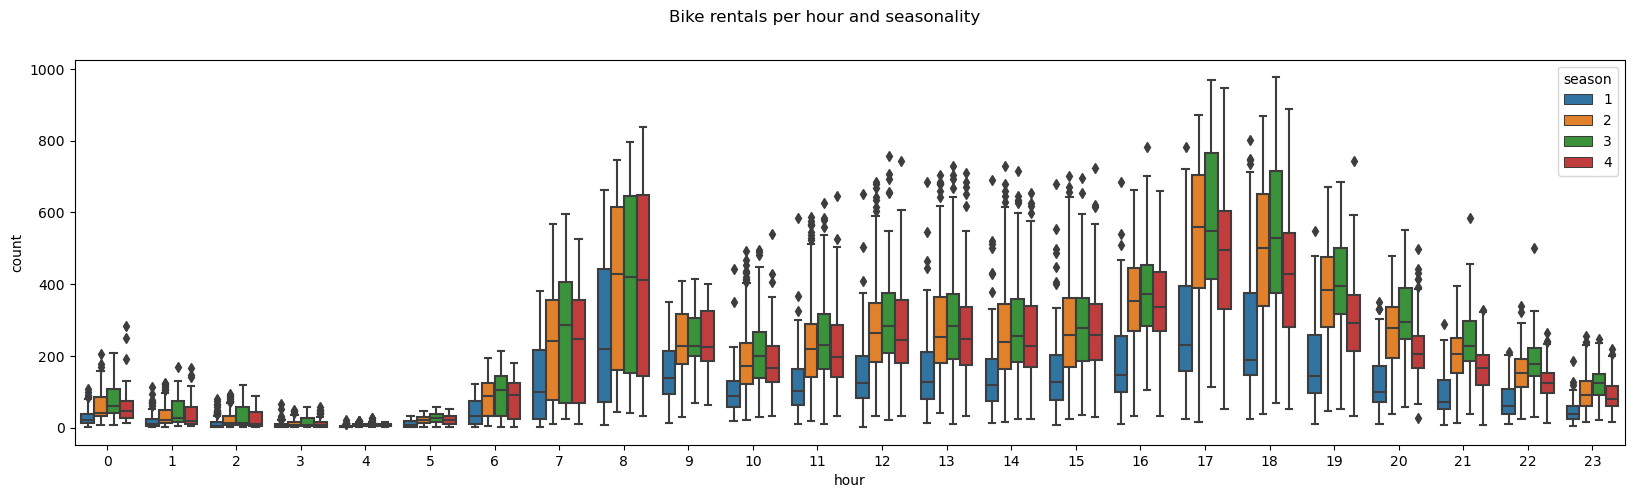

In [19]:
#Count per hour and season
fig,ax = plt.subplots(figsize = [20, 5])
fig.suptitle("Bike rentals per hour and seasonality")
sns.boxplot(data = train, x = "hour", y = "count", hue = "season")

#sns.histplot(data = train, x = "count")

looks like there are three peaks: at 8, 17 and 18. could correspond with the time when people are going and returning from work. 

Text(0.5, 1.0, 'Count per atemp')

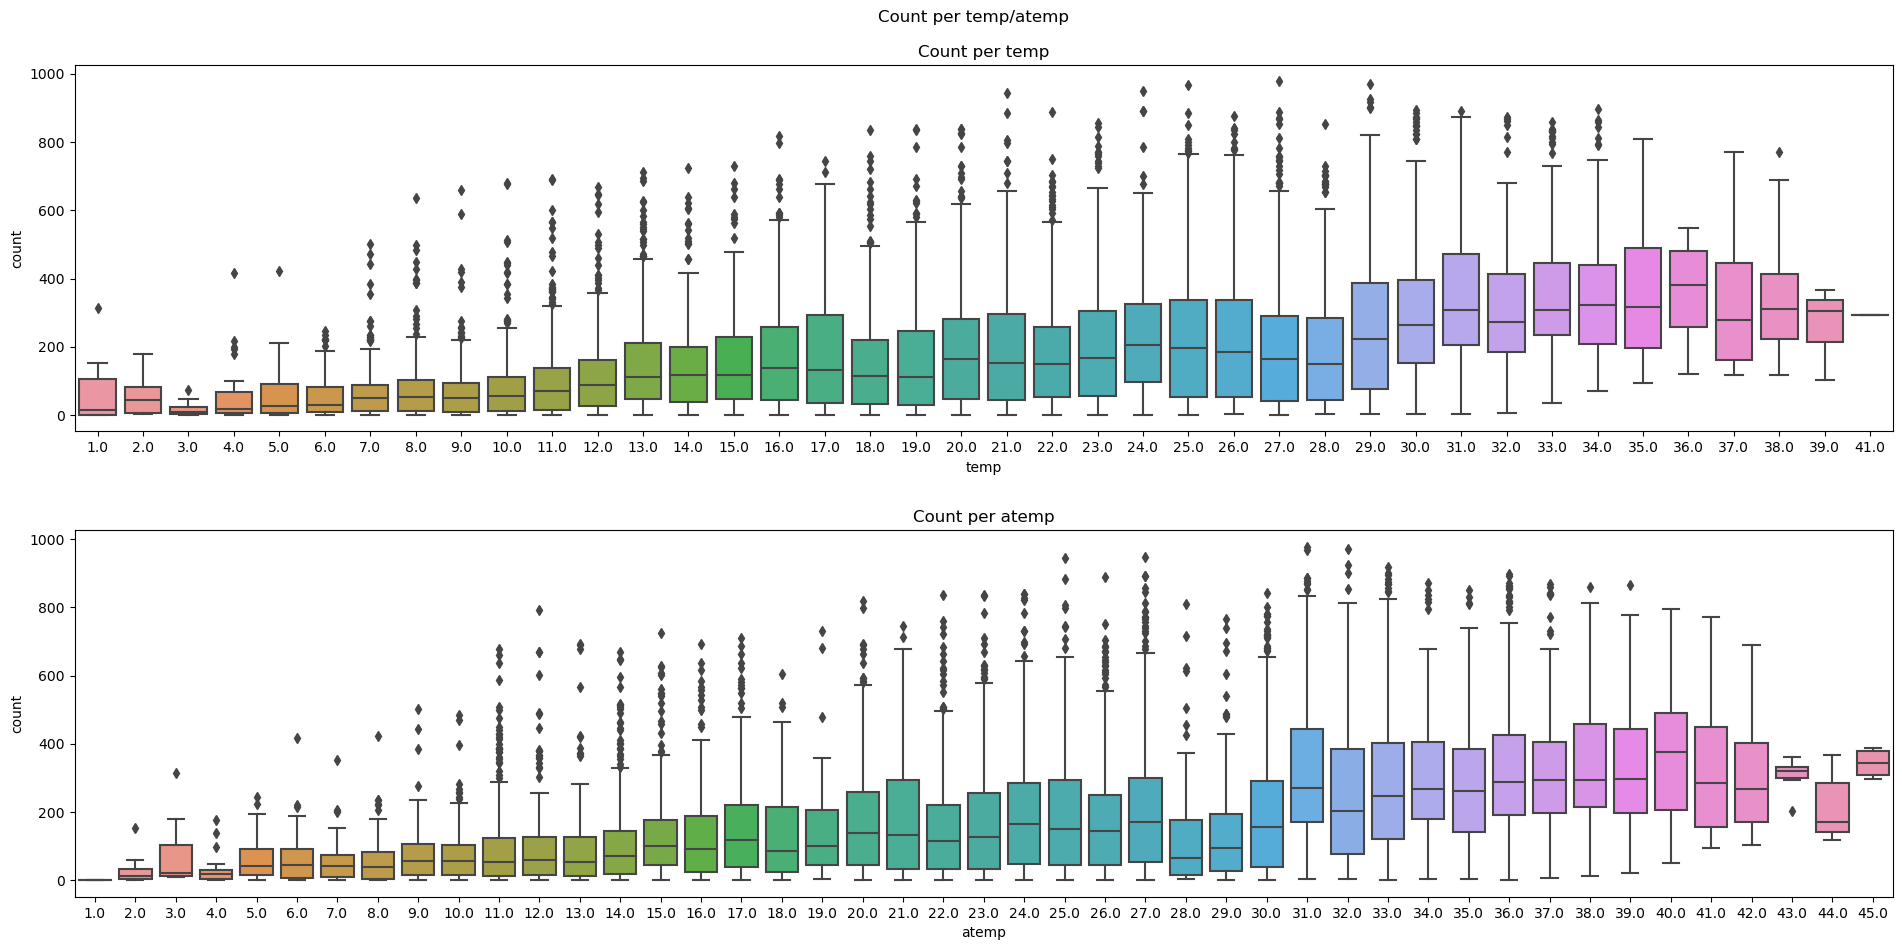

In [20]:
#Count per temp
fig,ax = plt.subplots(2,1, figsize = [20, 10])
fig.tight_layout(pad=5.0)
fig.suptitle('Count per temp/atemp')
train["temp"] = round(train["temp"])
train["atemp"] = round(train["atemp"])
sns.boxplot(ax = ax[0], data = train, x = "temp", y = "count")
ax[0].set_title("Count per temp")
sns.boxplot(ax = ax[1], data = train, x = "atemp", y = "count")
ax[1].set_title("Count per atemp")

almost similar graphs for temp and atemp. some outliers presented as well, and some low number of data is registered (e.g. temp 41.0). overall, it can be denoted that warmer it is more people tend to use bikes.

<AxesSubplot:xlabel='weather', ylabel='count'>

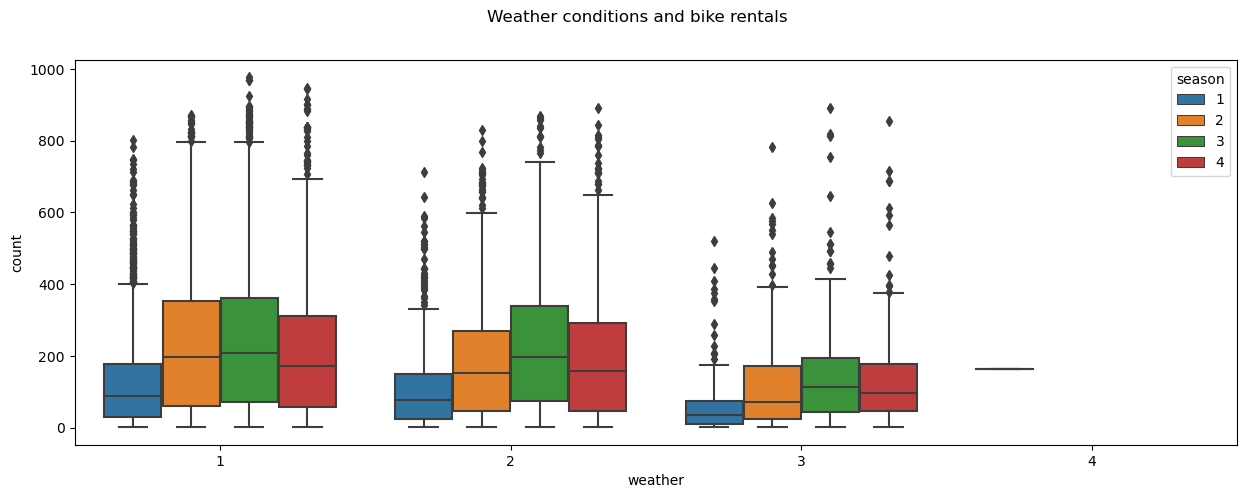

In [21]:
#count and weather conditions in different seasons
"""
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

"""
fig,ax = plt.subplots(figsize = [15,5])
fig.suptitle("Weather conditions and bike rentals")
sns.boxplot(data = train, x = "weather", y = "count", hue="season")



better the weather, more people will use bikes. weather #4 could be considered as outlier.

<AxesSubplot:xlabel='season', ylabel='count'>

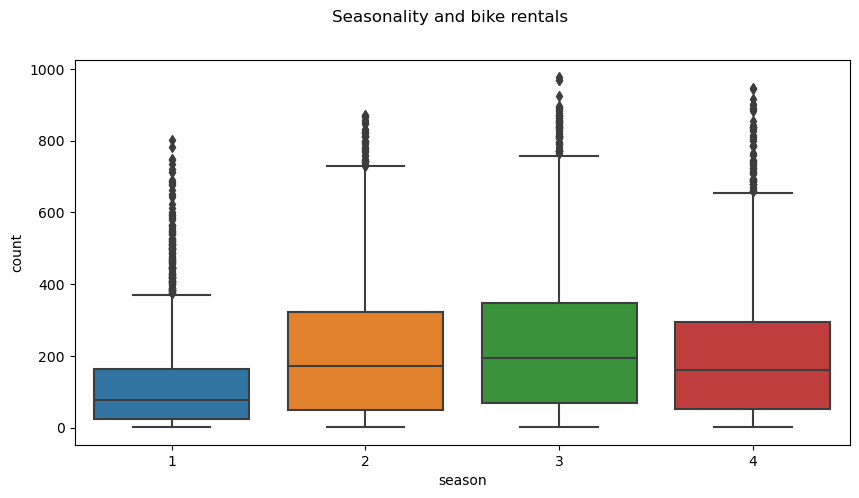

In [22]:
#seasonality and bike rentals
fig,ax = plt.subplots(figsize = [10,5])
fig.suptitle("Seasonality and bike rentals")
sns.boxplot(data = train, x = "season", y = "count")

<AxesSubplot:xlabel='humidity', ylabel='count'>

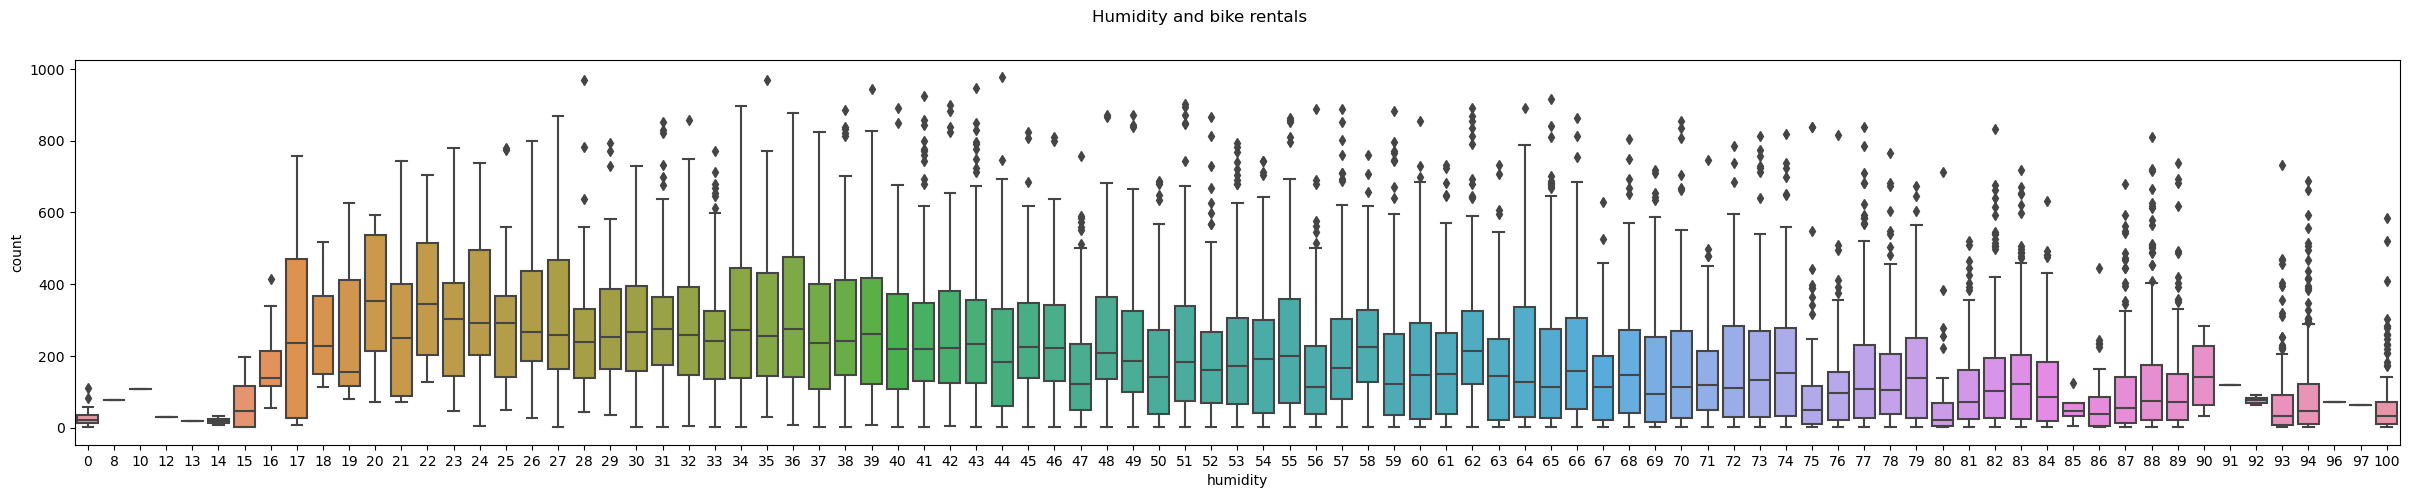

In [ ]:
fig,ax = plt.subplots(figsize = [30,5])
fig.suptitle("Humidity and bike rentals")
#train["humidity"] = round(train["humidity"])
#train["humidity"]=pd.qcut(train["humidity"], q = 10)
sns.boxplot(data = train, x = "humidity", y = "count")


less humid it is, more people tend to take bikes.

<AxesSubplot:xlabel='windspeed', ylabel='count'>

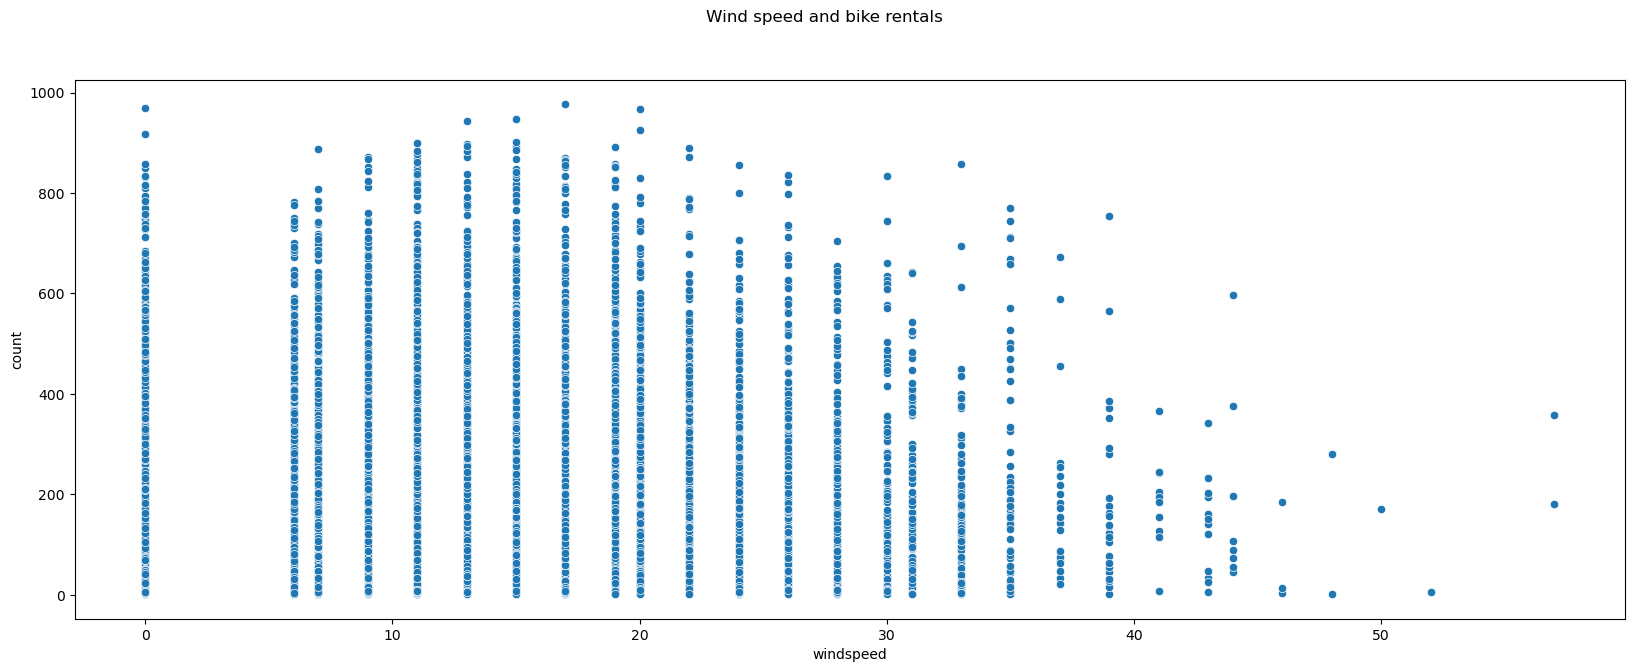

In [24]:
#wind and bike rentals
fig,ax = plt.subplots(figsize = [20,7])
fig.suptitle("Wind speed and bike rentals")
train["windspeed"] = round(train["windspeed"])
sns.scatterplot(data = train, x = "windspeed", y = "count")

less windy it is, more people tend to use bikes.

In [33]:
#SHowing the distribution of number of bike users numerical for each weather condition.
#train[(train["temp"] == 41)][["count", "registered", "season"]]
train.groupby("weather")["count"].count()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Count'>

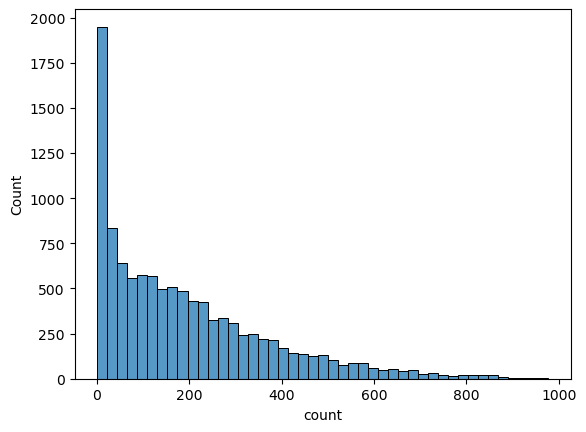

In [34]:
#Target distribution

sns.histplot(data = train, x = "count")

In [28]:
#Checking for correlations between data points

corr = train.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Users\gaming\AppData\Local\Temp\ipykernel_27464\3387198757.py:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour
season,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
holiday,0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
workingday,-0.01,-0.25,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
weather,0.01,-0.01,0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
temp,0.26,0.00,0.03,-0.06,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
atemp,0.26,-0.00,0.03,-0.06,0.98,nan,nan,nan,nan,nan,nan,nan,nan,nan
humidity,0.19,0.00,-0.01,0.41,-0.06,-0.04,nan,nan,nan,nan,nan,nan,nan,nan
windspeed,-0.15,0.01,0.01,0.01,-0.02,-0.06,-0.32,nan,nan,nan,nan,nan,nan,nan
casual,0.10,0.04,-0.32,-0.14,0.47,0.46,-0.35,0.09,nan,nan,nan,nan,nan,nan
registered,0.16,-0.02,0.12,-0.11,0.32,0.31,-0.27,0.09,0.50,nan,nan,nan,nan,nan


some variables are highly correlated with each other (in red). could be potentially dropped out from modelling.

### 3. training the model

In [39]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

#creating variables for preprocessors
onehot = OneHotEncoder(handle_unknown = "ignore")
scaler = StandardScaler()
ordenc = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=-1)

#separating columns in three ways of preprocessing: numerical, categorical, and ordinal
num_col = ['atemp', 'humidity', 'windspeed']
cat_col = ['season', 'holiday', 'workingday', 'weather', 'year']
ord_col = ['month', 'hour']


#building up a preprocessor
preprocessor = ColumnTransformer([("OneHotEncoder", onehot, cat_col), 
                                 ("StandardScaler", scaler, num_col),
                                  ("OrdinalEncoder", ordenc, ord_col)])



In [35]:
#creating data and target. droppign "datetime" from data because we have month, hour, and year included in the new dataset.
data = train.drop(["casual", "registered", "count", "datetime"], axis=1)
target = train["count"]

In [37]:
from sklearn.model_selection import train_test_split

#doing the data split into train and test
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.3)

#### 3.1 our baseline model was Ridge Regression.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV

model = make_pipeline(preprocessor, RidgeCV())

model.fit(data_train, target_train)

print(f'model score on training data: {model.score(data_train, target_train)}')
print(f'model score on testing data: {model.score(data_test, target_test)}')

model score on training data: 0.38976727057784866
model score on testing data: 0.40899395398718674


pretty bad performance. this model would not suffice to our purposes of predictions.

#### 3.2 let's try with RandomForestRegressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

#as we are using RandomForestRegressor we do not need to scale our numeric data, and it is more efficient to use OrdinalEncoder for the categorical values.

cat_col = ["holiday", "workingday", "year", "season", "weather","month", "hour"]
preprocessor = ColumnTransformer([("OrdinalEncoder", ordenc, cat_col)])


model = make_pipeline(preprocessor, RandomForestRegressor())

#We will be using ShuffleSplit cross validation technique to evaluate the accuracy of our model
cv = ShuffleSplit(n_splits=10, test_size = 0.3)

cv_results = cross_validate(model, data, target, cv = cv)
cv_results = pd.DataFrame(cv_results["test_score"], columns = ["test_score"])
cv_results

,test_score
0,0.912872
1,0.915589
2,0.910852
3,0.912526
4,0.896820
5,0.914966
6,0.909047
7,0.920679
8,0.910765
9,0.909044


In [50]:
#mean of cv_results is:
cv_results.mean()

test_score    0.911316
dtype: float64

In [51]:
#if we do the same but with scaler preprocessor as well:
preprocessor = ColumnTransformer([("OrdinalEncoder", ordenc, cat_col),
                                  ("StandardScaler", scaler, num_col)])


model = make_pipeline(preprocessor, RandomForestRegressor())

#We will be using ShuffleSplit cross validation technique to evaluate the accuracy of our model
cv = ShuffleSplit(n_splits=10, test_size = 0.3)

cv_results = cross_validate(model, data, target, cv = cv)
cv_results = pd.DataFrame(cv_results["test_score"], columns = ["test_score"])
cv_results

,test_score
0,0.934438
1,0.938805
2,0.939003
3,0.941584
4,0.933739
5,0.938420
6,0.933784
7,0.940630
8,0.941968
9,0.940074


In [52]:
#the preprocessor of categorical variables (OrdinalEncoder) and numerical var (standardScaler):

cv_results.mean()

test_score    0.938245
dtype: float64

preprocessing numerical and categorical variables shows a better validation score than only categorical preprocessing. we will use the model that is showing a better cv_result.

#### 3.3 lets check feature importance of RandomForest

In [56]:
#first we have to fit the pure model without preprocessing.

model_features = RandomForestRegressor()
model_features.fit(data_train, target_train)

RandomForestRegressor()

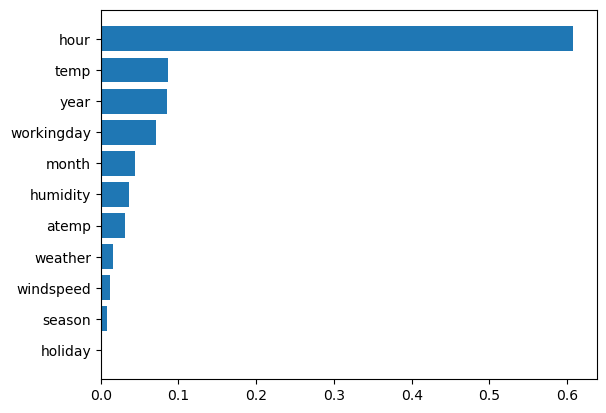

In [58]:
importances = model_features.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(data_train.columns)[indices])

here you can see the main feautures that are used by the model. holiday is near 0 probably because it is correlated with workingday. when it is a workingday, then logically it cannot be a holiday, and vice-versa.

#### 3.4 lets fit our data to see whether we are overfitting.

In [59]:
print(f'model score on training data: {model.score(data_train, target_train)}')
print(f'model score on testing data: {model.score(data_test, target_test)}')

model score on training data: 0.9912897998272604
model score on testing data: 0.9411077339345287


the training score could be an indication of some what over-optimistic generalization. however, testing data shows a pretty high result. our data might overfit a little bit, but in comparison to the testing data score, it does not look like we have an overfitting problem.

#### 3.5 lets find the best hyperparameters for our model

In [64]:
#we will use RandomSearchCV module and using the technique of nest-cv.
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold

#these are the hyperparameters that we will try to optimize.

n_estimators = [int(x) for x in np.linspace(start = 5, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [65]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [66]:
import warnings
warnings.filterwarnings('ignore')


inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=3, shuffle=True)

#in order to reduce the amount of time used to find the best params, we will only have 20 iterations with cv of 5.
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = inner_cv, verbose=1)# Fit the random search model

test_score = cross_val_score(rf_random, data, target, cv=outer_cv, n_jobs=2)
print(f"The mean score using nested cross-validation is: "
      f"{test_score.mean():.3f} +/- {test_score.std():.3f}")

The mean score using nested cross-validation is: 0.937 +/- 0.005


In [68]:
#best params of the random forest
rf_random.fit(data_train, target_train)
rf_random.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

the DataFrame with all of the parametrs that have been studied.

In [69]:
column_results = [
    f"param_{name}" for name in random_grid.keys()]
column_results += [
    "mean_test_score", "std_test_score", "rank_test_score"]

cv_results = pd.DataFrame(rf_random.cv_results_)
cv_results = cv_results[column_results].sort_values(
    "mean_test_score", ascending=False)
cv_res = cv_results.fillna(0)
cv_results

,param_n_estimators,param_max_features,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_bootstrap,mean_test_score,std_test_score,rank_test_score
10,200,auto,80,10,5,True,0.929478,0.006943,1
5,156,auto,100,5,5,True,0.928945,0.007414,2
7,5,auto,70,5,2,True,0.923421,0.005728,3
4,5,auto,50,10,5,True,0.919684,0.006905,4
8,70,auto,20,10,5,False,0.903772,0.008633,5
1,135,auto,90,10,5,False,0.903700,0.008666,6
14,178,auto,50,10,1,False,0.898209,0.009946,7
6,113,auto,10,10,1,False,0.889493,0.009204,8
12,91,sqrt,50,5,1,False,0.873437,0.006747,9
3,178,sqrt,100,5,2,True,0.849068,0.005995,10


it can be noted that if you really would want to optimize your model, there are other potential ways to set your hyperparameters. they might show a bit worse score, but the time of the fit and predict would, potentially, improve. for instance, line 4 shows n_estimators = 5 with param_max_depth = 50, and the difference between scores from the top 1 is not as big.

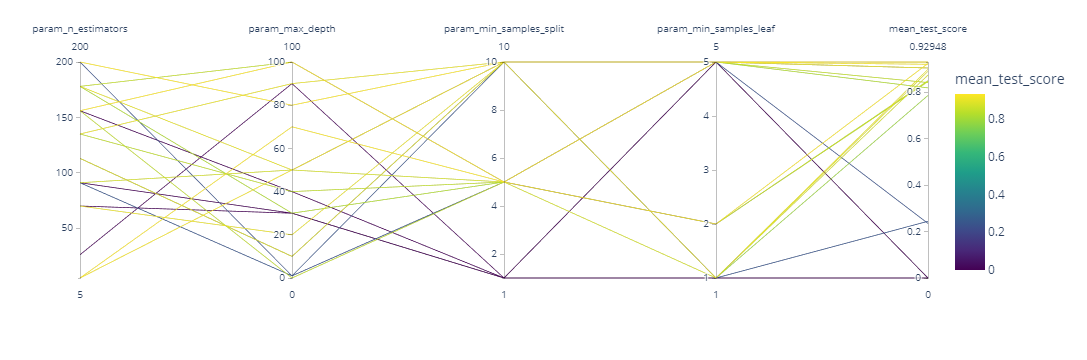

In [72]:
#here you can see all the combinations of the hyperparameters fitting within a graph.
import plotly.express as px

dimension = ['param_n_estimators', 'param_max_features', 'param_max_depth',
       'param_min_samples_split', 'param_min_samples_leaf', 'param_bootstrap',
       'mean_test_score']
fig = px.parallel_coordinates(cv_res, color = 'mean_test_score',            
                              dimensions = dimension,
                              color_continuous_scale=px.colors.sequential.Viridis)
fig.show() #it doesnt show binary parametrs

#### using the best params to evaluate our model with ShuffleSplit

In [74]:
model = make_pipeline(preprocessor, RandomForestRegressor(**rf_random.best_params_))
cv_results = cross_validate(model, data, target, cv = cv)
cv_results = pd.DataFrame(cv_results["test_score"], columns = ["test_score"])
cv_results



,test_score
0,0.939185
1,0.935242
2,0.938170
3,0.928516
4,0.934746
5,0.934454
6,0.932330
7,0.936349
8,0.936707
9,0.937215


In [75]:
#the mean score of our cv is:

cv_results.mean()

test_score    0.935291
dtype: float64

#### lets evaluate how well our model predicts using the regression error estimators

In [80]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

model.fit(data_train, target_train)
predicted = model.predict(data_test)

print(f" The mean absolute percentage error of RandomForestRegressor model is: {mean_absolute_percentage_error(target_test, predicted)}")
print(f" The median absolute error of RandomForestRegressor model is: {median_absolute_error(target_test, predicted)} and std of {median_absolute_error(target_test, predicted)}")


 The mean absolute percentage error of RandomForestRegressor model is: 0.35172349145821324
 The median absolute error of RandomForestRegressor model is: 17.38775620761892 and std of 17.38775620761892


In [78]:
target.describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

our count data is highly skewed to the right and has many outliers. in addition, there are many frequencies of count to be close to 0, which can significantly reduce the accuracy of the mean absolute percentage error estimation.
thus, we will use the median absolute error as a more robust estimator for outliers and positive skewness.
we can see that our model is making an error of around 17. this is not that bad, because if we look at the count distribution we see that it has a huge standard deviation. and majority of cases (50%) are located between 42 and 284 bike rentals. thus, the error of 17 is not that bad.

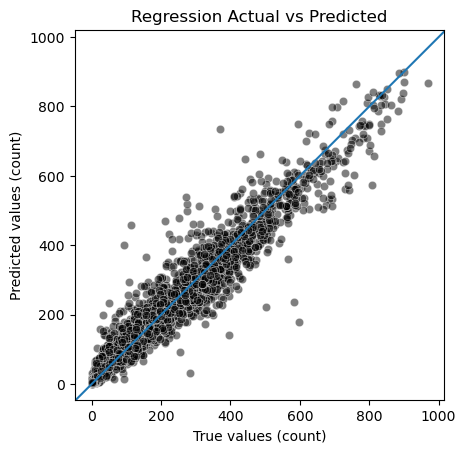

In [83]:
#here is visual representation of the error distribution
predicted_actual = {
    "True values (count)": target_test, "Predicted values (count)": model.predict(data_test)}
predicted_actual = pd.DataFrame(predicted_actual)


sns.scatterplot(data=predicted_actual,
                x="True values (count)", y="Predicted values (count)",
                color="black", alpha=0.5)
plt.axline((0, 0), slope=1, label="Perfect fit")
plt.axis('square')
_ = plt.title("Regression Actual vs Predicted")

#### 4. let's predict our test dataset

first we would have to add month, hours, year to our test dataset.

The predicted number for test dataset is: count    192.414788
dtype: float64 with std: count    171.540362
dtype: float64


<AxesSubplot:ylabel='Frequency'>

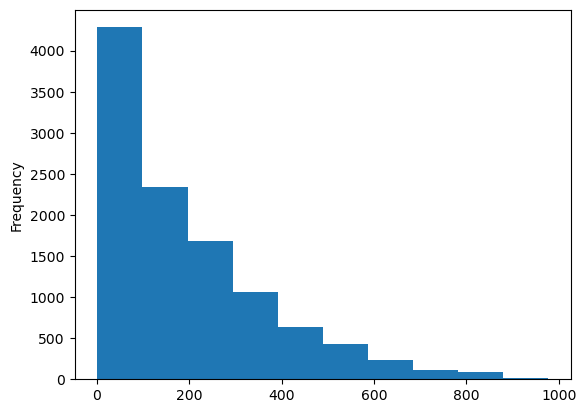

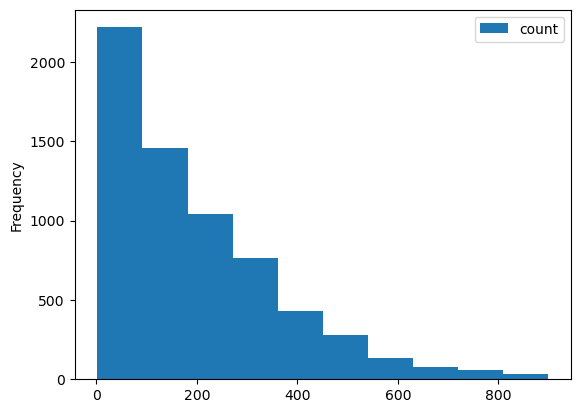

In [85]:
test = pd.read_csv("test.csv")
test["datetime"] = test["datetime"].astype('datetime64[ns]')
test["month"] = test["datetime"].dt.month
test["year"] = test["datetime"].dt.year
test["hour"] = test["datetime"].dt.hour

test = test.drop(["datetime"],axis=1)

#making count prediction for test dataset
#as we do not have anything to compare to within the test dataset we would just predict the count using our model
test_count = model.predict(test)
test_count = pd.DataFrame(test_count, columns = ["count"])

print(f"The predicted number for test dataset is: {test_count.mean()} with std: {test_count.std()}")

#plotting two histograms of the count values from train dataset and count values predicted by our model for test dataset
train["count"].plot.hist()
test_count.plot.hist()

you can see that two histograms are almost identical. apart from the fact that frequency is higher for train dataset. this is normal because the train data set had much more records than test dataset.

In [87]:
train_count = train["count"]
print(f"Train dataset count description: {train_count.describe()} \n \n")
print(f"Train dataset count description: {test_count.describe()}")


Train dataset count description: count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64 
 

Train dataset count description:              count
count  6493.000000
mean    192.414788
std     171.540362
min       1.641751
25%      51.843043
50%     152.964726
75%     284.783057
max     899.178883


Text(0.5, 1.0, 'Count of bike for train datataset')

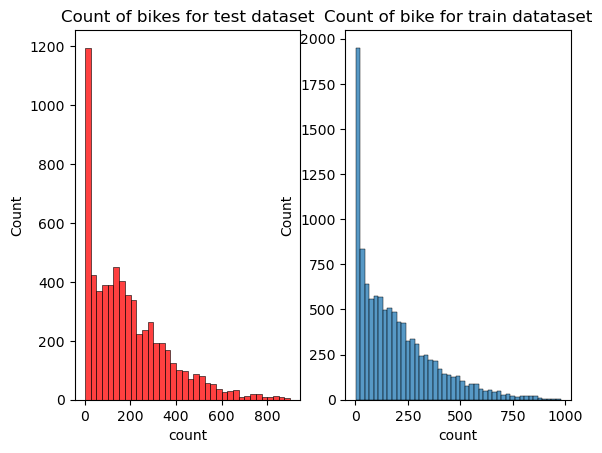

In [89]:
#the same histogram distribution but next to each other
train_count = pd.DataFrame(train_count, columns = ["count"])

fig,ax = plt.subplots(1,2)
sns.histplot(ax = ax[0], data = test_count, x = "count", color = "r")
ax[0].set_title("Count of bikes for test dataset")
sns.histplot(ax = ax[1], data = train_count, x = "count")
ax[1].set_title("Count of bike for train datataset")

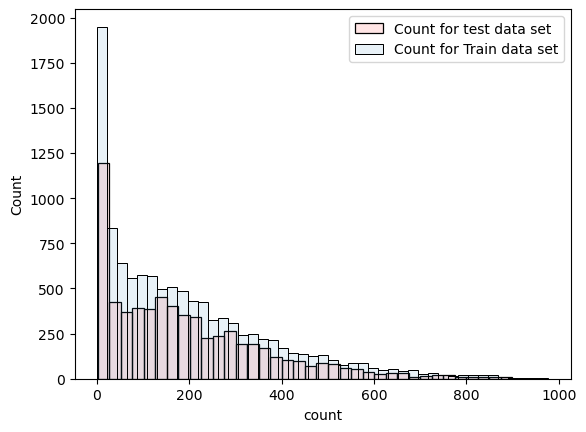

In [90]:
#the same histogram distributions but on top of each other

fig,ax = plt.subplots()
sns.histplot(data = test_count, x = "count", alpha = 0.1, color = "r", label = "Count for test data set")
sns.histplot(data = train_count, x = "count", alpha = 0.1, label = "Count for Train data set")
plt.legend()

Text(0.5, 1.0, 'Count for Train dataset')

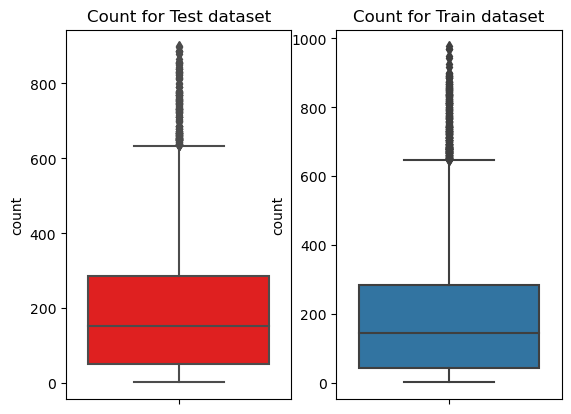

In [92]:
#boxplots of two datasets targets
fig,ax = plt.subplots(1,2)
sns.boxplot(ax=ax[0],data = test_count, y = "count", color = "r", orient = "v")
ax[0].set_title("Count for Test dataset")
sns.boxplot(ax = ax[1],data = train_count, y = "count", orient="v")
ax[1].set_title("Count for Train dataset")

almost identical with more or less similar pattern of outliers.

In [93]:
test = pd.concat([test, test_count], axis = 1)
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,year,hour,count
0,1,0,1,1,10.66,11.365,56,26.0027,1,2011,0,8.588984
1,1,0,1,1,10.66,13.635,56,0.0000,1,2011,1,5.264306
2,1,0,1,1,10.66,13.635,56,0.0000,1,2011,2,3.671759
3,1,0,1,1,10.66,12.880,56,11.0014,1,2011,3,3.517610
4,1,0,1,1,10.66,12.880,56,11.0014,1,2011,4,2.841685
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,12,2012,19,327.669031
6489,1,0,1,2,10.66,12.880,60,11.0014,12,2012,20,219.409541
6490,1,0,1,1,10.66,12.880,60,11.0014,12,2012,21,154.784516
6491,1,0,1,1,10.66,13.635,56,8.9981,12,2012,22,120.779818


#### conclusion

as there are no other possibility to check whether our prediction for test dataset is right, we decided to put our predicted values on top of the target values from train dataset. we can see that they are almost identical. in addition, as the data from test dataset represent the last 10 days of each month from the period of 2011 and 2012, it was expected that the final prediction should follow more or less the same pattern as the train dataset. thus, we can conclude that our prediction should be more or less accurate to the reality. 

of course, this predictions should be taken with careful consideration and should not be fully relied upon. first there should be some process of implementation which would evaluate in the real-world how well our predictions are. 